В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням kNearestNeighboors, знайдемо оптимальні гіперпараметри для цього методу і зробимо базові ансамблі. Це дасть змогу порівняти перформанс моделі з попередніми вивченими методами.

0. Зчитайте дані `train.csv` та зробіть препроцесинг використовуючи написаний Вами скрипт `process_bank_churn.py` так, аби в результаті отримати дані в розбитті X_train, train_targets, X_val, val_targets для експериментів.

  Якщо Вам не вдалось реалізувати в завданні `2.3. Дерева прийняття рішень` скрипт `process_bank_churn.py` - можна скористатись готовим скриптом з запропонованого рішення того завдання.

In [64]:
import pandas as pd
from process_bank_churn import preprocess_data, preprocess_new_data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [67]:
raw_df = pd.read_csv('bank-customer-churn-prediction-dlu/train.csv')
df = preprocess_data(raw_df)

X_train = df['X_train']
train_targets = df['y_train']
X_val = df['X_val']
val_targets = df['y_val']
input_cols = df['input_cols']
scaler = df['scaler']
encoder = df['encoder']

1. Навчіть на цих даних класифікатор kNN з параметрами за замовченням і виміряйте точність з допомогою AUROC на тренувальному та валідаційному наборах. Зробіть заключення про отриману модель: вона хороша/погана, чи є high bias/high variance?

In [3]:
knn = KNeighborsClassifier()

In [8]:
knn.fit(X_train, train_targets)

C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [9]:
y_train_probs = knn.predict_proba(X_train)[:, 1]
y_val_probs = knn.predict_proba(X_val)[:, 1]

Area Under ROC Curve (AUC): 0.9554


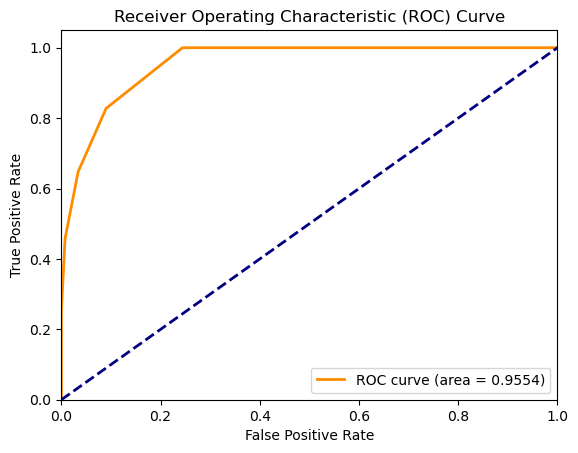

In [10]:
# Обчислення ROC-кривої для train
fpr, tpr, thresholds = roc_curve(train_targets, y_train_probs)

# Обчислення AUC
roc_auc = auc(fpr, tpr)

# Виведення AUC
print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

# Побудова графіку ROC-кривої
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Area Under ROC Curve (AUC): 0.8726


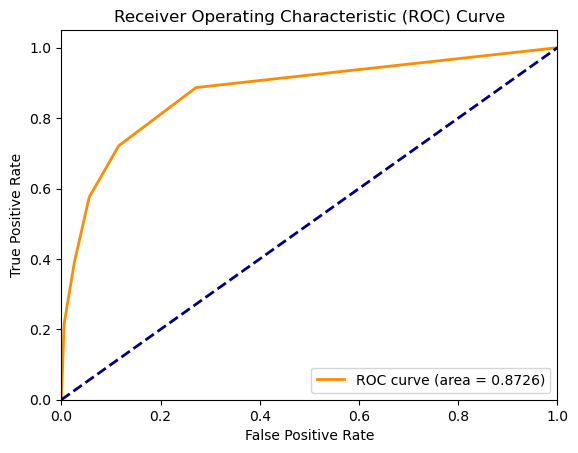

In [11]:
# Обчислення ROC-кривої для val
fpr, tpr, thresholds = roc_curve(val_targets, y_val_probs)

# Обчислення AUC
roc_auc = auc(fpr, tpr)

# Виведення AUC
print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

# Побудова графіку ROC-кривої
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Спостереження:** На тренувальних даних Area Under ROC Curve (AUC): `0.96`, на валідаційних Area Under ROC Curve (AUC): `0.87`. Це свідчить про перенавчання моделі і високий bias.

2. Використовуючи `GridSearchCV` знайдіть оптимальне значення параметра `n_neighbors` для класифікатора `kNN`. Псотавте крос валідацію на 5 фолдів.

  Після успішного завершення пошуку оптимального гіперпараметра
    - виведіть найкраще значення параметра
    - збережіть в окрему змінну `knn_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `knn_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи стала вона краще порівняно з попереднім пукнтом (2) цього завдання? Чи є вона краще за дерево прийняття рішень з попереднього ДЗ?

In [13]:
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1,25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, train_targets)

C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Anastasiia\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [16]:
print(knn_gs.best_params_, knn_gs.best_score_)

{'n_neighbors': 9} 0.8664999999999999


In [17]:
knn_best = knn_gs.best_estimator_

In [18]:
y_train_probs = knn_best.predict_proba(X_train)[:, 1]
y_val_probs = knn_best.predict_proba(X_val)[:, 1]

Area Under ROC Curve (AUC): 0.9397


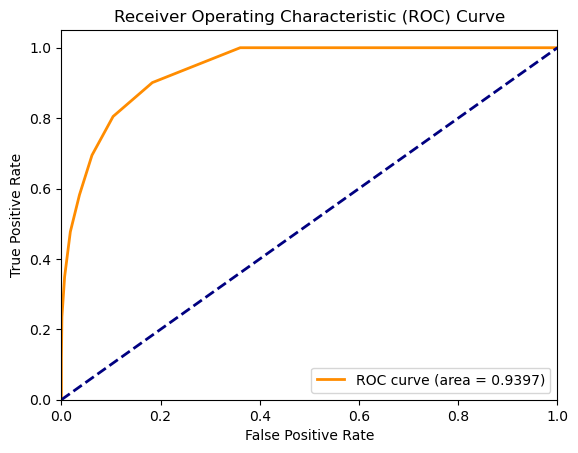

In [19]:
# Обчислення ROC-кривої для train
fpr, tpr, thresholds = roc_curve(train_targets, y_train_probs)

# Обчислення AUC
roc_auc = auc(fpr, tpr)

# Виведення AUC
print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

# Побудова графіку ROC-кривої
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Area Under ROC Curve (AUC): 0.8880


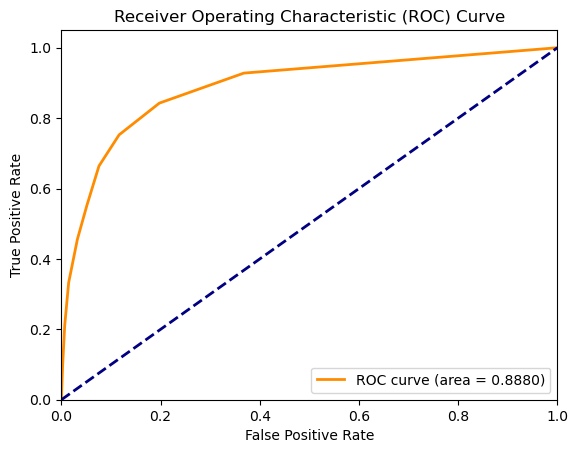

In [20]:
# Обчислення ROC-кривої для val
fpr, tpr, thresholds = roc_curve(val_targets, y_val_probs)

# Обчислення AUC
roc_auc = auc(fpr, tpr)

# Виведення AUC
print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

# Побудова графіку ROC-кривої
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Спостереження:** На тренувальних даних Area Under ROC Curve (AUC) зменшився до: `0.94`, на валідаційних Area Under ROC Curve (AUC) збільшився: `0.88`. Зміни не є суттєвими в порівнянні з попередньою моделькою. Це досі свідчить про перенавчання моделі і високий bias. Якщо порівнбвати із моделлю із попереднього ДЗ, де на тренувальних даних Area Under ROC Curve (AUC) був: `0.93`, а на валідаційних Area Under ROC Curve (AUC) був: `0.93`, то нова модель гірша.

3. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `GridSearchCV` за сіткою параметрів
  - `max_depth` від 1 до 20 з кроком 2
  - `max_leaf_nodes` від 2 до 10 з кроком 1

  Обовʼязково при цьому ініціюйте модель з фіксацією `random_seed`.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `dt_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли вручну?

In [45]:
np.random.seed(29)

dt = DecisionTreeClassifier()
params_dt = {
    'max_depth': np.arange(1,21,2), 
    'max_leaf_nodes': np.arange(2,11)
}

dt_gs = GridSearchCV(dt, params_dt, cv=3, scoring='roc_auc')

In [46]:
%%time
dt_gs.fit(X_train, train_targets)

CPU times: total: 1.19 s
Wall time: 2.99 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='roc_auc')

In [47]:
print(dt_gs.best_params_, dt_gs.best_score_)

{'max_depth': 5, 'max_leaf_nodes': 10} 0.8999874939140476


In [41]:
dt_best = dt_gs.best_estimator_

In [42]:
y_train_probs = dt_best.predict_proba(X_train)[:, 1]
y_val_probs = dt_best.predict_proba(X_val)[:, 1]

Area Under ROC Curve (AUC): 0.9004


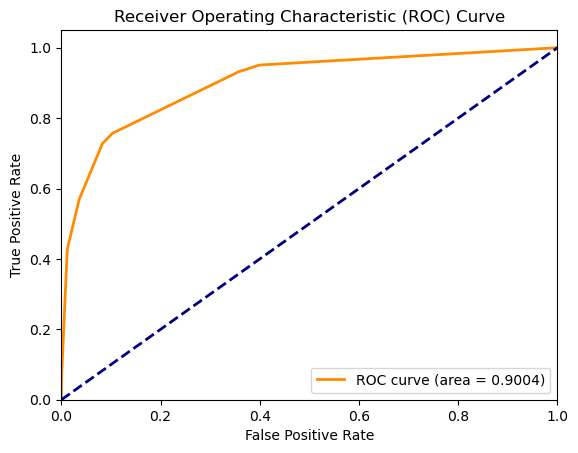

In [43]:
# Обчислення ROC-кривої для train
fpr, tpr, thresholds = roc_curve(train_targets, y_train_probs)

# Обчислення AUC
roc_auc = auc(fpr, tpr)

# Виведення AUC
print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

# Побудова графіку ROC-кривої
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Area Under ROC Curve (AUC): 0.9043


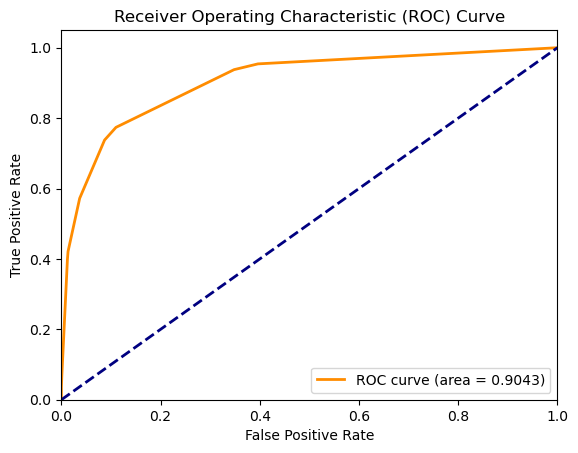

In [44]:
# Обчислення ROC-кривої для val
fpr, tpr, thresholds = roc_curve(val_targets, y_val_probs)

# Обчислення AUC
roc_auc = auc(fpr, tpr)

# Виведення AUC
print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

# Побудова графіку ROC-кривої
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Спостереження:** На тренувальних даних Area Under ROC Curve (AUC) зменшився до `0.9`, а на валідаційних даних Area Under ROC Curve (AUC) збільшився до `0.90`. Ця модель значно краща в порівнянні з попередніми, оскільки вона добре узагальнює.

Якщо порівнювати із моделлю, що я найшла вручну у попередньому ДЗ, то ця нвоа модель гірша. Оскільки попередня на тренувальних даних Area Under ROC Curve (AUC) та на валідаційних Area Under ROC Curve (AUC) видавала значеня `0.93`. 

4. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `RandomizedSearchCV` за заданою сіткою параметрів і кількість ітерацій 40.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, зафіксуйте `random_seed` процедури крос валідації та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_random_search_best` найкращу модель, знайдену з `RandomizedSearchCV`
    - оцініть якість передбачень  `dt_random_search_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли з `GridSearch`?
    - проаналізуйте параметри `dt_random_search_best` і порівняйте з параметрами `dt_best` - яку бачите відмінність? Ця вправа потрібна аби зрозуміти, як різні налаштування `DecisionTreeClassifier` впливають на якість моделі.

In [53]:
np.random.seed(29)

dt = DecisionTreeClassifier()
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

dt_rgs = RandomizedSearchCV(dt, params_dt, n_iter=40, cv=3, scoring='roc_auc')

In [54]:
%%time
dt_rgs.fit(X_train, train_targets)

CPU times: total: 500 ms
Wall time: 904 ms


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=40,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'splitter': ['best', 'random']},
                   scoring='roc_auc')

In [55]:
print(dt_rgs.best_params_, dt_rgs.best_score_)

{'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 17, 'max_features': None, 'max_depth': 17, 'criterion': 'entropy'} 0.9182900800132439


{'max_depth': 5, 'max_leaf_nodes': 10} 0.8999874939140476
{'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 17, 'max_features': None, 'max_depth': 17, 'criterion': 'entropy'} 0.9182900800132439

In [56]:
dt_random_search_best = dt_rgs.best_estimator_

In [57]:
y_train_probs = dt_random_search_best.predict_proba(X_train)[:, 1]
y_val_probs = dt_random_search_best.predict_proba(X_val)[:, 1]

In [58]:
# Обчислення ROC-кривої для train
fpr, tpr, thresholds = roc_curve(train_targets, y_train_probs)
roc_auc = auc(fpr, tpr)
print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

Area Under ROC Curve (AUC): 0.9209


In [59]:
# Обчислення ROC-кривої для val
fpr, tpr, thresholds = roc_curve(val_targets, y_val_probs)
roc_auc = auc(fpr, tpr)
print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

Area Under ROC Curve (AUC): 0.9195


**Спостереження:** На тренувальних та на валідаційних даних даних Area Under ROC Curve (AUC) `0.92`. Ця модель краща в порівнянні з попередніми, оскільки вона добре узагальнює і має вищі показники AUC.

Якщо порівнювати параметри dt_best та dt_random_search_best помітно, що є різниця у параметрі `max_depth`. У першому випадку це `5`, а у другому `17`. Також відрізняється параметр `max_leaf_nodes`. Був `10`, а в новій моделі `17`. `min_samples_split` за замовчуванням у попередній моделі був `2`, а в новій кращим виявився `5`, що могло вплинути на якість моделі. Також відрізняється показник `criterion`, який за замовчуванням у попередній моделі був `gini`, а в новій кращим виявився `entropy`, що також могло вплинути на якість моделі. Решта значень однакові для обох моделей. 

5. Якщо у Вас вийшла метрика `AUROC` в цій серії експериментів - зробіть ще один `submission` на Kaggle і додайте код для цього і скріншот скора на публічному лідерборді нижче.

  Сподіваюсь на цьому етапі ви вже відчули себе справжнім дослідником 😉

In [69]:
raw_test_data = pd.read_csv('bank-customer-churn-prediction-dlu/test.csv')

test_data = preprocess_new_data(raw_test_data, scaler=scaler, encoder=encoder, input_cols=input_cols)
y_test_probs = dt_random_search_best.predict_proba(test_data['X_test'])[:, 1]
test_data['Exited'] = y_test_probs

sample_submission = pd.read_csv('bank-customer-churn-prediction-dlu/sample_submission.csv')
sample_submission['Exited'] = test_data['Exited']

sample_submission.to_csv('bank-customer-churn-prediction-dlu/submission_tree_2.csv', index=False)

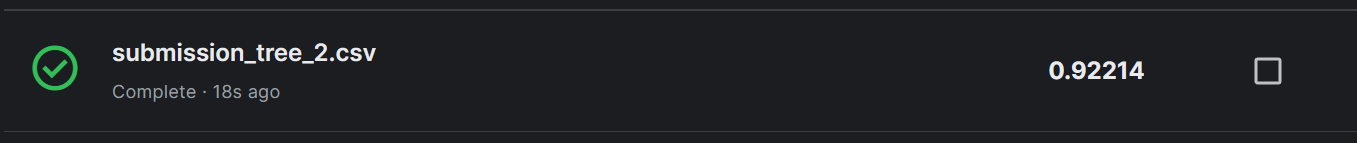